### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
%matplotlib inline

## **Background Subtraction**

Background subtraction is a common and widely used technique for **distinguishing moving objects from an image sequence given by a static camera**. It works by generating a foreground mask i.e, a binary image containing the pixels belonging to moving objects in the scene.

There are many applications of background subtraction. Such as,

- Detection of moving objects 
- Motion estimation
- Background / foreground modeling
- Image segmentation
- Intelligent video-surveillance etc.


The background/foreground segmentation stage could be addressed by simple approaches, e.g. by computing the difference between two successive frames, or by building a time-averaged background image. However, such simple algorithms are very limited in outdoor environment because of global variation of luminance, shadows of objects, etc.

Since this is an important step in video analysis, many background subtraction algorithms have been proposed since 90’s to tackle these problems. 

OpenCV implements about a dozen of such background subtraction algorithms (available under the [BackgroundSubtractor Class](https://docs.opencv.org/4.7.0/d7/df6/classcv_1_1BackgroundSubtractor.html)).

Background modeling consists of two main steps:
1. Background Initialization: an initial model of the background is computed (the barebone algorithm).
2. Background Update: model is updated continuously with the subsequent frames in order to adapt to possible changes in the scene.

The BackgroundSubtractor **calculates the foreground mask by performing a subtraction between the current frame and a background model** (containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene).

*The `BackgroundSubtractor` class has two functions available to all its instances.*

> The `BackgroundSubtractor.apply(image, learningRate=-1)`

<u>Function Parameters</u>
- image: the next frame
- learningRate: Varies between 0 and 1. Indicates how fast the background model is learnt. Negative parameter value makes the algorithm to use some automatically chosen learning rate. 0 means that the background model is not updated at all, 1 means that the background model is completely reinitialized from the last frame. 

**Returns** a foreground mask as an 8 bit binary image.

> The `BackgroundSubtractor.getBackgroundImage()` returns the background image. Note that, sometimes the background image can be very blurry, as it contain the average background statistics.

##### *Now let's look at an example (we will use the `KNN` based subtractor algorithm)*

In [3]:
# initializing the barebone background subtractor model
# we can also use, cv.BackgroundSubtractor('model_name', *args, **kwargs)

backSub = cv.createBackgroundSubtractorKNN()

Here we've initiated the model with default settings. But the model can be initialized with some arguments. See the [Doc](https://docs.opencv.org/4.7.0/de/de1/group__video__motion.html#gac9be925771f805b6fdb614ec2292006d) for details.

**`->`** This code returns a tuple of the current_frame and the foreground mask i.e, (frame, fgMask) when "q" is pressed.

In [4]:
def backSubKNN(src="./videos/vtest.avi"):
    # read in the video file (should be captured from a static camera)
    cap = cv.VideoCapture(src)

    if cap.isOpened() is False:
        try:
            cap.open()
        except:
            print("Couldn't read the video file")

    while True:
        ret, frame = cap.read()

        if ret is False:
            print("Couldn't read any frame. Stream may have ended. Exiting...")
            break

        # Every frame is used both for calculating the foreground mask and for updating the background
        fgMask = backSub.apply(frame)

        cv.imshow("Frame", frame)

        keyboard_input = cv.waitKey(10)

        if keyboard_input == ord("q"):
            # first we create a small white rectangle on the top left corner of the frame
            # and then write the current frame number there
            cv.rectangle(frame, (10, 30), (120, 80), (255, 255, 255), -1)
            current_frame_number = int(cap.get(cv.CAP_PROP_POS_FRAMES))
            cv.putText(
                frame,
                str(current_frame_number),
                (15, 70),
                cv.FONT_ITALIC,
                1,
                (0, 0, 0),
                1,
            )

            cap.release()
            cv.destroyAllWindows()
            return (frame, fgMask)

    cap.release()
    cv.destroyAllWindows()

In [5]:
frame, fgMask = backSubKNN()

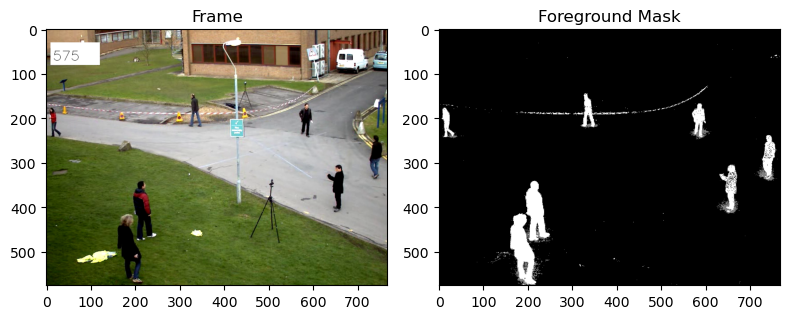

In [6]:
plt.figure(figsize=(8, 4), dpi=100)
plt.subplot(121), plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB)), plt.title("Frame")
plt.subplot(122), plt.imshow(fgMask, "gray"), plt.title("Foreground Mask")
plt.tight_layout()
plt.show()

`Note:` The grayish regions in the detected masks are the shadows. This behaviour can be disabled when creating the subtractor object.

**`->`** This code creates a whole video using the foreground masks (foreground masks are found from the "./videos/vtest.avi" file and is saved to the "./videos/vtest_backSub.mp4" file)

In [7]:
# read in the video file (should be captured from a static camera)
cap = cv.VideoCapture("./videos/vtest.avi")

if cap.isOpened() is False:
    try:
        cap.open()
    except:
        print("Couldn't read the video file")

frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))


# videowriter
fourcc = cv.VideoWriter_fourcc(*"mp4v")
out = cv.VideoWriter(
    "./videos/vtest_backSub.mp4", fourcc, 20, (frame_width, frame_height), True
)

while True:
    ret, frame = cap.read()

    if ret is False:
        print("Couldn't read any frame. Stream may have ended. Exiting...")
        break

    # Every frame is used both for calculating the foreground mask and for updating the background
    fgMask = backSub.apply(frame)

    # write the foreground mask
    out.write(fgMask)

cap.release()
out.release()
cv.destroyAllWindows()

Couldn't read any frame. Stream may have ended. Exiting...
